# <center>  Génération et parcours d'un labyrinthe parfait </center>

In [1]:
import random
import matplotlib.pyplot as plt
import sys
from collections import defaultdict
#from jyquickhelper import add_notebook_menu

#add_notebook_menu()



# I) Introduction

Un labyrinthe est un ensemble complexe de chemins tortueux, à embranchements multiples, dans lequel on peut tourner en rond et se perdre. Il trouve ses applications dans plusieurs jeux videos

# II) Objectif 

Créer une application permettant de générer de manière aléatoire un labyrinthe parfait (l’utilisateur pourra décider de la taille du labyrinthe généré, par exemple 10x10 ou 50x100) et permettant également de résoudre (parcourir) le labyrinthe.

# III) Génération du Labyrinthe parfait par fusion

On choisit de générer un labyrinthme parfait. Un labyrinthe est dit parfait si à partir de n'importe quelles position de départ et position de sortie choisies à l'avance, il existera toujours un chemain qui les relient.

Pour cela on choisit de génrer un labyrinthe par la méthode de fusion de cellules. Cela consiste à générer un quadrillage consitué des cellues adjacentes toutes fermées.
Chaque cellule sera numéroté et considerée comme une zone à part. Lorsque deux zones sont ouvertes l'une sur l'autre, ils eront dites fusionnées et aurant le meme numéro. On procède à la fusion des zones de manière aléatoire jusqu'au ce que il n'exite qu'une seule zone;

La classe suivante permet de générer de manière aléatoires un labyrinthe avec des dimensions fixées à l'avance.

In [2]:
class Labyrinthe_02:
    def __init__(self, width, height):
        self.width=width
        self.height=height
        self.cells=[]
        zone=0
        num_cell=0
        self.graph0=defaultdict(list)
        #self.graph = defaultdict(lambda: defaultdict(int))
        
        #construction des cellules fermées et de la liste des zones initiales
        #origine en haut à gauche
        for i in range(height):
            self.cells.append([])
            for j in range(width):
                #chaque cell est entièrement fermée
                #False = on passe pas = mur fermé ; True = on peut passer = mur ouvert
                self.cells[i].append({'N':False, 'E':False, 'S':False, 'W':False, 'zone':zone, 'num_cell': num_cell})#chaque zone est unique au départ zone=i*width+j
                zone+=1
                num_cell+=1
        self.n_zones=width*height
        self.generer()


    def fusionner(self, i1, j1, dir):
        #i2,j2 et dir2 sont associés à la case de la direction opposée
        if dir=='N':
            i2=i1-1;j2=j1;dir2='S'
        elif dir=='S':
            i2=i1+1;j2=j1;dir2='N'
        elif dir=='W':
            i2=i1;j2=j1-1;dir2='E'
        elif dir=='E':
            i2=i1;j2=j1+1;dir2='W'

        if(i2>=0 and i2<self.height and j2>=0 and j2<self.width):
            zone1=self.cells[i1][j1]['zone']
            zone2=self.cells[i2][j2]['zone']
            if zone1!=zone2:
                self.cells[i1][j1][dir]=True
                self.cells[i2][j2][dir2]=True
                self.graph0[str(self.cells[i1][j1]['num_cell'])].append(str(self.cells[i2][j2]['num_cell']))
                self.graph0[str(self.cells[i2][j2]['num_cell'])].append(str(self.cells[i1][j1]['num_cell']))
                #print(self.graph0)
                #fusion des zones :
                for i in range(self.height):
                    for j in range(self.width):
                        if self.cells[i][j]['zone']==zone2:
                            self.cells[i][j]['zone']=zone1
                self.n_zones-=1;#permettra de s'arrêter sans vider toute la pile
                return zone1,  self.graph0
        return False
        


    def generer(self):
        #cells à traiter
        pile_cells=[]
        for dir in ['N', 'E', 'S', 'W']:
            for i in range(self.height):
                for j in range(self.width):
                    pile_cells.append((i,j,dir))
        random.shuffle(pile_cells)
        while(len(pile_cells)>0 and self.n_zones>1):
            (i,j,dir)=pile_cells.pop()
            self.fusionner(i,j,dir)
            #décommenter ci-dessous pour visualiser les étapes :
            #self.print(True)
        return self.cells
    def print_plot(self):
        for i in range(self.height):
            y=self.height - i
            color="b"
            for j in range(self.width):
                x=j
                for dir in ['N', 'E', 'S', 'W' ]:
                    if not self.cells[i][j]['N']:
                        plt.plot([x,x+1], [y+1,y+1], color)
                    if not self.cells[i][j]['E']:
                        plt.plot([x+1,x+1], [y,y+1],color)
                    if not self.cells[i][j]['S']:
                        plt.plot([x,x+1], [y,y],color)
                    if not  self.cells[i][j]['W']:
                        #print("plot gauche")
                        plt.plot([x,x], [y,y+1],color)
        plt.show()

    #labels peut prendre 3 formes :
    #True : imprime les zones de la méthode générer
    #tableau T de taille height par width où T[i][j] est la valeur affichée dans la cellule (i,j)
    def print(self, labels=False):
        from math import floor
        #alias :
        w=self.width;h=self.height;c=self.cells;
        #si on imprime les labels, il faut élargir la taille des couloirs
        if(labels==True):
            labels=[ [ c[i][j]['zone'] for i in range(h) ] for j in range(w) ]

        if(labels):
            len_lbl=max([ max([ len(str(labels[i][j])) for i in range(h) ]) for j in range(w) ])+1
        inters=[' ','╴','╷', '┐','╶','─','┌','┬','╵','┘','│','┤','└','┴','├','┼']
        t=""
        #la grille des intersections de cases est de taille (N+1)(M+1)
        for i in range(h+1):
            interligne=""
            for j in range(w+1):
                #up, right, bottom, left : les 4 parties de la croix "┼" #False = mur, True = pas mur
                #Coins et bords:
                up=False if i==0 else None
                left=False if j==0 else None
                right=False if j==w else None
                bottom=False if i==h else None
                if j==w:
                    if up==None:up=not c[i-1][j-1]['E']
                    if bottom==None:bottom=not c[i][j-1]['E']
                if i==h:
                    bottom=False
                    if right==None:right=not c[i-1][j]['S']
                    if left==None:left=not c[i-1][j-1]['S']
                #intérieur :
                if up==None:up=not c[i-1][j]['W']
                if right==None:right=not c[i][j]['N']
                if bottom==None:bottom=not c[i][j]['W']
                if left==None:left=not c[i][j-1]['N']
                #-> mot binaire à 4 bits. 16 cas qu'on a mis dans l'ordre dans la liste inters
                #indice inters
                k=-up*8+right*4+bottom*2+left
                if not labels:
                    #espacement horizontal supplémentaire
                    sep= "─" if left else " "
                    t+=sep+inters[k]
                    if j==self.width:t+="\n"
                else:
                    sep= (len_lbl+2)*"─" if right else (len_lbl+2)*" "


                    lbl=labels[i][j] if i<self.height and j<self.width else ""

                    len_sp_left=floor((len_lbl - len(str(lbl)))/2)
                    len_sp_right=len_lbl-len(str(lbl))-len_sp_left
                    txt_lbl=str(lbl)
                    interligne+=("│" if bottom else " ")+" "*(len_sp_left+1)+txt_lbl+" "*(len_sp_right+1)
                    t+=inters[k]+sep
                    if j==self.width:
                        t+="\n" + interligne + "\n"
        print(t)

    

On illustre deux exemples de génération de labyrinthes
Le premier labyrinthe est carrée et le deuxième est rectangulaire 


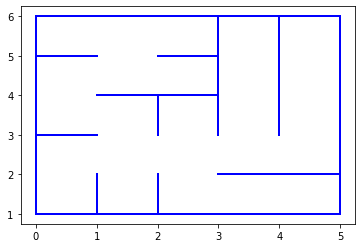

In [3]:
n=5
laby01 = Labyrinthe_02(n,n)
laby01.print_plot()

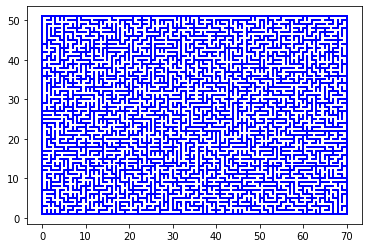

In [4]:
height=50  # nombre des lignes
width=70   # nombre des colonnes
laby02 = Labyrinthe_02(width,height)
laby02.print_plot()

# IV) Génération du Labyrinthe parfait par fusion

Pour faciliter le parcours de notre labyrinthe, on opte pour la réprésentation de labyrinthe par un graphe. Les cellules seront les noeuds de notre graphe. Et le passage d'une cellule à une autre( lorsque cela est possible) sera représenté par une arrete avec un poids 1.

Pour cela on construit la fonction laby2graphe qui permet de représenter notre labyrinthe par un graphe. Le graphe à recupérer ser sous forme d'un dictionnare imbriqué (dictionniare de dictionnaire)

In [5]:
# Programme pour dictionnaires imbriqués

#print()
def laby2graphe(graphe):
    Graphe_={}
    for i, j in graphe.items():
        dic_t={}
        for k in j:
            dic_t[k]=1
        Graphe_[i]=dic_t
    return Graphe_
    


In [6]:
graphe=laby02.graph0
Graphe_=laby2graphe(graphe)
print(Graphe_)

{'1363': {'1293': 1, '1433': 1, '1364': 1}, '1293': {'1363': 1, '1223': 1, '1292': 1, '1294': 1}, '2085': {'2155': 1}, '2155': {'2085': 1, '2154': 1, '2156': 1}, '3199': {'3269': 1, '3129': 1}, '3269': {'3199': 1, '3268': 1, '3339': 1}, '2244': {'2243': 1, '2245': 1}, '2243': {'2244': 1, '2173': 1}, '3139': {'3209': 1, '3138': 1}, '3209': {'3139': 1, '3210': 1}, '2348': {'2349': 1, '2278': 1}, '2349': {'2348': 1, '2419': 1, '2350': 1}, '2879': {'2878': 1, '2949': 1, '2880': 1, '2809': 1}, '2878': {'2879': 1}, '418': {'419': 1, '348': 1}, '419': {'418': 1, '349': 1, '489': 1}, '380': {'379': 1, '381': 1}, '379': {'380': 1, '309': 1}, '600': {'601': 1, '670': 1, '599': 1}, '601': {'600': 1, '531': 1}, '1431': {'1430': 1}, '1430': {'1431': 1, '1429': 1}, '1899': {'1898': 1}, '1898': {'1899': 1, '1897': 1}, '1719': {'1649': 1, '1720': 1}, '1649': {'1719': 1, '1579': 1}, '272': {'271': 1}, '271': {'272': 1, '341': 1, '201': 1}, '3413': {'3483': 1, '3343': 1}, '3483': {'3413': 1, '3484': 1},

On affiche notre graphe à l'aide du module networkx

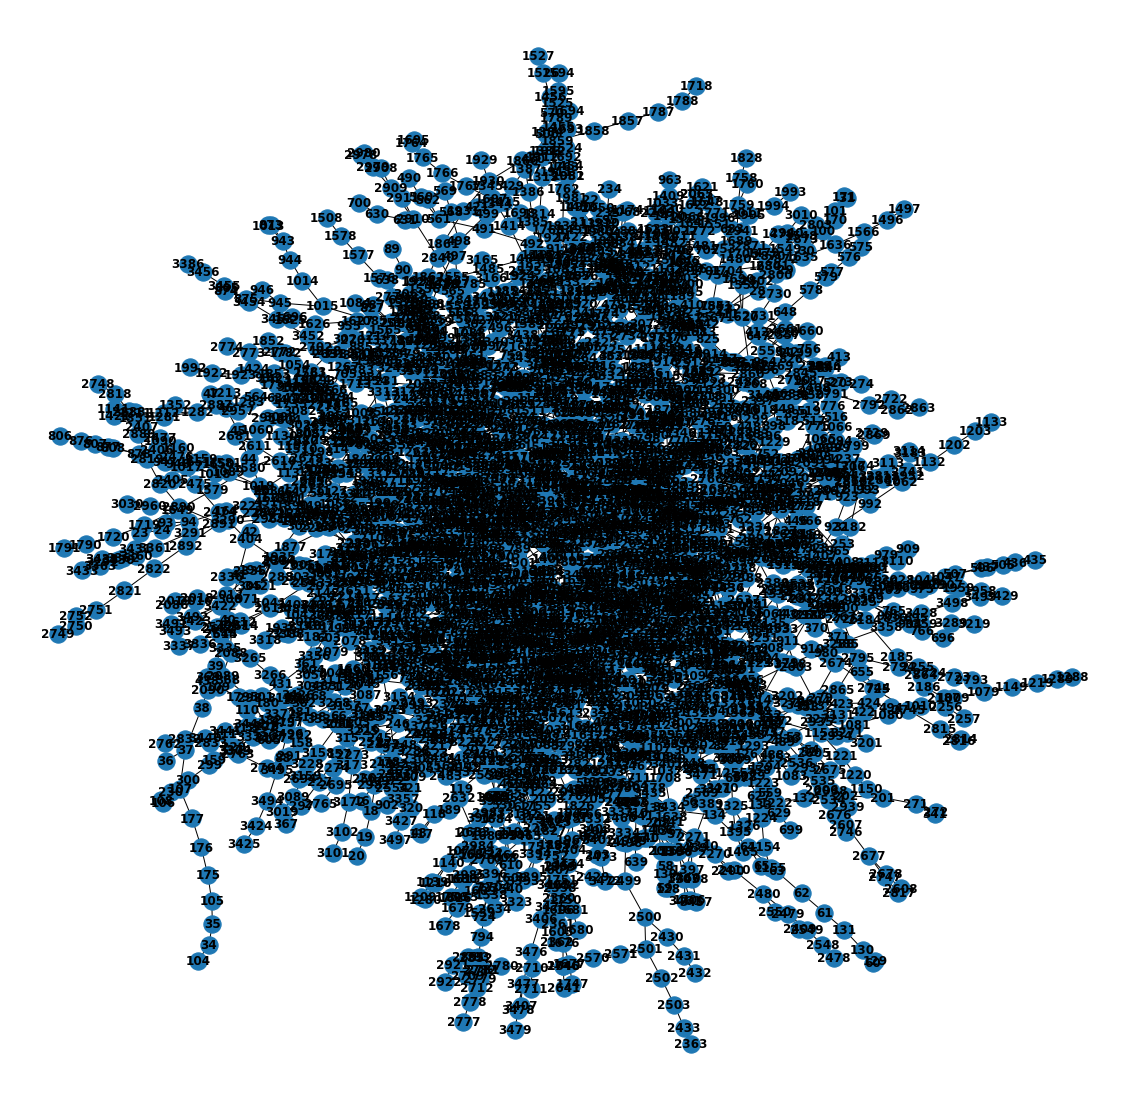

In [7]:

import networkx as nx
g = nx.Graph()
for i, j in Graphe_.items():
    for k in j:
        g.add_edge( i,k )
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20,20))
nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

# V) Parcours du Labyrinthe parfait

Etant donnée deux points (noeuds), un point de départ et un point d'arrivé, on cherche à déterminer le chemin à distance minimale entre ce deux points. L'algorithme de dijkstra permet de déterminer ce chemin minimal

In [9]:
def dijkstra(graph,src,dest,visited=None,distances=None,predecessors=None):
    """ calculates a shortest path tree routed in src
    """    
    # a few sanity checks
    if src not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if dest not in graph:
        raise TypeError('The target of the shortest path cannot be found')    
    # ending condition
    if src == dest:
        # We build the shortest path and display it
        path=[]
        pred=dest
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred,None)
        # reverses the array, to display the path nicely
        readable=path[0]
        for index in range(1,len(path)): 
            readable = path[index]+'--->'+readable
        #prints it 
        print('shortest path - array: '+str(path))
        print("path: "+readable+",   cost="+str(distances[dest]))     
    else : 
        if visited is None:
            visited=[]
        if distances is None:
            distances={}
        if predecessors is None:
            predecessors={}
        # if it is the initial  run, initializes the cost
        if not visited: 
            distances[src]=0
        # visit the neighbors
        for neighbor in graph[src] :
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
        # mark as visited
        visited.append(src)
        # now that all neighbors have been visited: recurse                         
        # select the non visited node with lowest distance 'x'
        # run Dijskstra with src='x'
        unvisited={}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))        
        x=min(unvisited, key=unvisited.get)
        dijkstra(graph,x,dest,visited,distances,predecessors)
    

In [10]:
dijkstra(Graphe_, '0','18')

shortest path - array: ['18', '17', '87', '86', '85', '84', '154', '153', '223', '222', '152', '151', '150', '149', '219', '220', '290', '289', '288', '287', '217', '216', '215', '145', '146', '76', '75', '74', '144', '143', '142', '72', '71', '70', '0']
path: 0--->70--->71--->72--->142--->143--->144--->74--->75--->76--->146--->145--->215--->216--->217--->287--->288--->289--->290--->220--->219--->149--->150--->151--->152--->222--->223--->153--->154--->84--->85--->86--->87--->17--->18,   cost=34


In [11]:
dijkstra(Graphe_, '0','19')

shortest path - array: ['19', '18', '17', '87', '86', '85', '84', '154', '153', '223', '222', '152', '151', '150', '149', '219', '220', '290', '289', '288', '287', '217', '216', '215', '145', '146', '76', '75', '74', '144', '143', '142', '72', '71', '70', '0']
path: 0--->70--->71--->72--->142--->143--->144--->74--->75--->76--->146--->145--->215--->216--->217--->287--->288--->289--->290--->220--->219--->149--->150--->151--->152--->222--->223--->153--->154--->84--->85--->86--->87--->17--->18--->19,   cost=35


In [12]:
dijkstra(Graphe_, '0','20')

shortest path - array: ['20', '19', '18', '17', '87', '86', '85', '84', '154', '153', '223', '222', '152', '151', '150', '149', '219', '220', '290', '289', '288', '287', '217', '216', '215', '145', '146', '76', '75', '74', '144', '143', '142', '72', '71', '70', '0']
path: 0--->70--->71--->72--->142--->143--->144--->74--->75--->76--->146--->145--->215--->216--->217--->287--->288--->289--->290--->220--->219--->149--->150--->151--->152--->222--->223--->153--->154--->84--->85--->86--->87--->17--->18--->19--->20,   cost=36


In [13]:
dijkstra(Graphe_, '30','20')

shortest path - array: ['20', '19', '18', '17', '87', '86', '85', '84', '154', '153', '223', '293', '294', '364', '434', '433', '503', '573', '643', '713', '714', '784', '783', '782', '852', '851', '921', '922', '923', '924', '994', '1064', '1134', '1135', '1136', '1137', '1067', '997', '998', '928', '927', '857', '858', '788', '789', '790', '860', '859', '929', '930', '931', '861', '862', '932', '933', '1003', '1002', '1072', '1073', '1074', '1004', '934', '935', '1005', '1075', '1145', '1215', '1216', '1286', '1285', '1284', '1354', '1355', '1356', '1357', '1358', '1359', '1360', '1361', '1291', '1292', '1293', '1223', '1153', '1152', '1082', '1012', '1011', '941', '942', '872', '802', '732', '733', '663', '662', '592', '522', '452', '453', '454', '384', '383', '313', '312', '242', '241', '311', '381', '380', '379', '309', '239', '169', '99', '98', '168', '167', '166', '96', '26', '27', '28', '29', '30']
path: 30--->29--->28--->27--->26--->96--->166--->167--->168--->98--->99--->169--

In [14]:
dijkstra(Graphe_, '50','20')

shortest path - array: ['20', '19', '18', '17', '87', '86', '85', '84', '154', '153', '223', '293', '294', '364', '434', '433', '503', '573', '643', '713', '714', '784', '783', '782', '852', '851', '921', '922', '923', '924', '994', '1064', '1134', '1135', '1136', '1137', '1067', '997', '998', '928', '927', '857', '858', '788', '789', '790', '860', '859', '929', '930', '931', '861', '862', '932', '933', '1003', '1002', '1072', '1073', '1074', '1004', '934', '935', '1005', '1075', '1145', '1215', '1216', '1286', '1285', '1284', '1354', '1355', '1356', '1357', '1358', '1359', '1360', '1361', '1291', '1292', '1293', '1223', '1153', '1152', '1082', '1012', '1011', '941', '942', '872', '802', '732', '733', '734', '664', '665', '735', '736', '737', '738', '739', '740', '741', '811', '812', '813', '814', '815', '745', '746', '676', '606', '536', '466', '396', '397', '327', '328', '329', '330', '331', '261', '191', '121', '51', '50']
path: 50--->51--->121--->191--->261--->331--->330--->329--->

# VI) Conclusion et Perspectives

In [ ]:
Un labyrinthe parfait a été généré par la méthode de fusion. Afin de pouvoir le parcourir, on a choisit de le convertir en un graphe et utiliser l'algorithme Dijkstra.
Des prochaines travaux seront consacrées à la gé